# Homework 4: Data Visualization
- **Name**:  Karan Sudhakar Ghag
- **UB Username**: karansud
- **UB Person Number**:  50547165

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

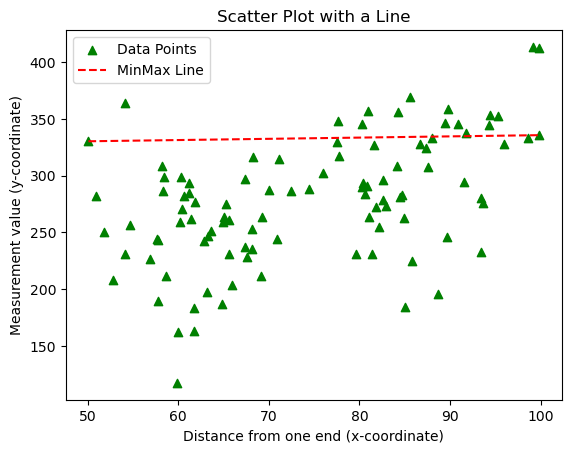

In [1]:
#Q.1
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv('scatter_data.csv')

plt.scatter(data1['% x'], data1[' y '], color='green', marker='^', label='Data Points')

sorted_data1 = data1.sort_values(by='% x')
plt.plot([sorted_data1['% x'].iloc[0], sorted_data1['% x'].iloc[-1]],
         [sorted_data1[' y '].iloc[0], sorted_data1[' y '].iloc[-1]],
         color='red', linestyle='--', label='MinMax Line')

plt.title('Scatter Plot with a Line')

plt.xlabel('Distance from one end (x-coordinate)')
plt.ylabel('Measurement value (y-coordinate)')

plt.legend()
plt.show()

### Problem 2 - Histogram

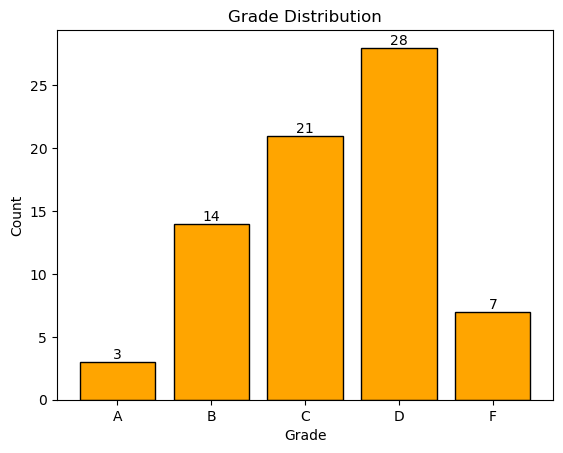

In [2]:
#Q.2
data1 = pd.read_csv("C:/Users/DELL/Documents/student_grades.csv")
data1
data1.columns = data1.columns.str.strip()
score = [(90, 100), (80, 90), (70, 80), (60, 70), (0, 60)]
label = ['A', 'B', 'C', 'D', 'F']
data1['grade_category'] = pd.cut(data1['avgScore'],
                                       bins=[0, 60, 70, 80, 90, 101],
                                       labels=label,
                                       right=False) 
grades = data1['grade_category'].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

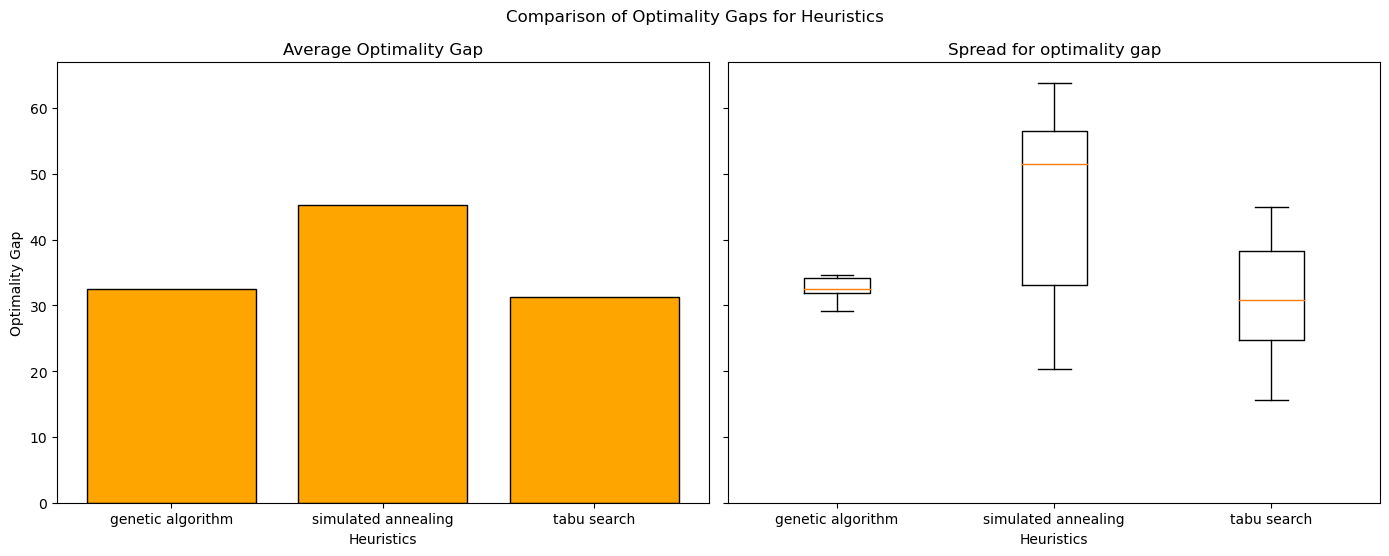

In [3]:
#Q.3
data1 = pd.read_csv("C:/Users/DELL/Documents/solution_data.csv")
data1.columns = data1.columns.str.strip()

optimal = data1[data1["SolnMethod"] == "optimal"]
merge = data1.merge(optimal, on = '% Problem', suffixes = ('', 'optimal'))
merge['optimality_gap'] = ((merge['Valueoptimal'] - merge['Value'])/merge['Valueoptimal'])*100
heuristic = merge[merge['SolnMethod'] != 'optimal']
average = heuristic.groupby('SolnMethod')['optimality_gap'].mean().reset_index()
boxplot = heuristic.groupby('SolnMethod')['optimality_gap'].apply(list).reset_index(name='optimality_gap')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(average['SolnMethod'], average['optimality_gap'], color = 'orange', edgecolor = 'black')
ax1.set(title = 'Average Optimality Gap', xlabel = 'Heuristics', ylabel = 'Optimality Gap')

boxplot_data = [row['optimality_gap'] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title = 'Spread for optimality gap', xlabel = 'Heuristics', xticklabels = boxplot['SolnMethod'])

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()

--- 
## Part 2 - Explore New Plot Types

The code is a way of making a picture that shows how different types of flowers are similar or different from each other. The flowers are called Iris and they have three kinds: setosa, versicolor, and virginica. It first gets the information about the flowers from a file that has data (some numbers and words in it). The numbers tell how big the flowers are, such as how long and wide their petals and sepals are. The words tell what kind of flower it is, such as setosa, versicolor, or virginica. The code just puts this information into a table that is easier to work with.

It then uses the Seaborn tool to make a picture that has many small pictures inside it. Each small picture shows how two numbers are related to each other, such as how the petal length and the petal width change together. The code also uses different colors and shapes to show what kind of flower it is. For example, setosa flowers might be blue circles, versicolor flowers might be green triangles, and virginica flowers might be red squares. This way, you can see if the flowers of the same kind are close together or far apart from each other.

Then finally I used the Matplotlib tool to show the big picture that has all the small pictures in it. This picture gives you a lot of information about the flowers and how they are different or similar to each other. You can also see if there are any patterns or trends in the data, such as if the bigger flowers are more likely to be one kind or another.

- **URL of Example Code**: https://seaborn.pydata.org/generated/seaborn.pairplot.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data


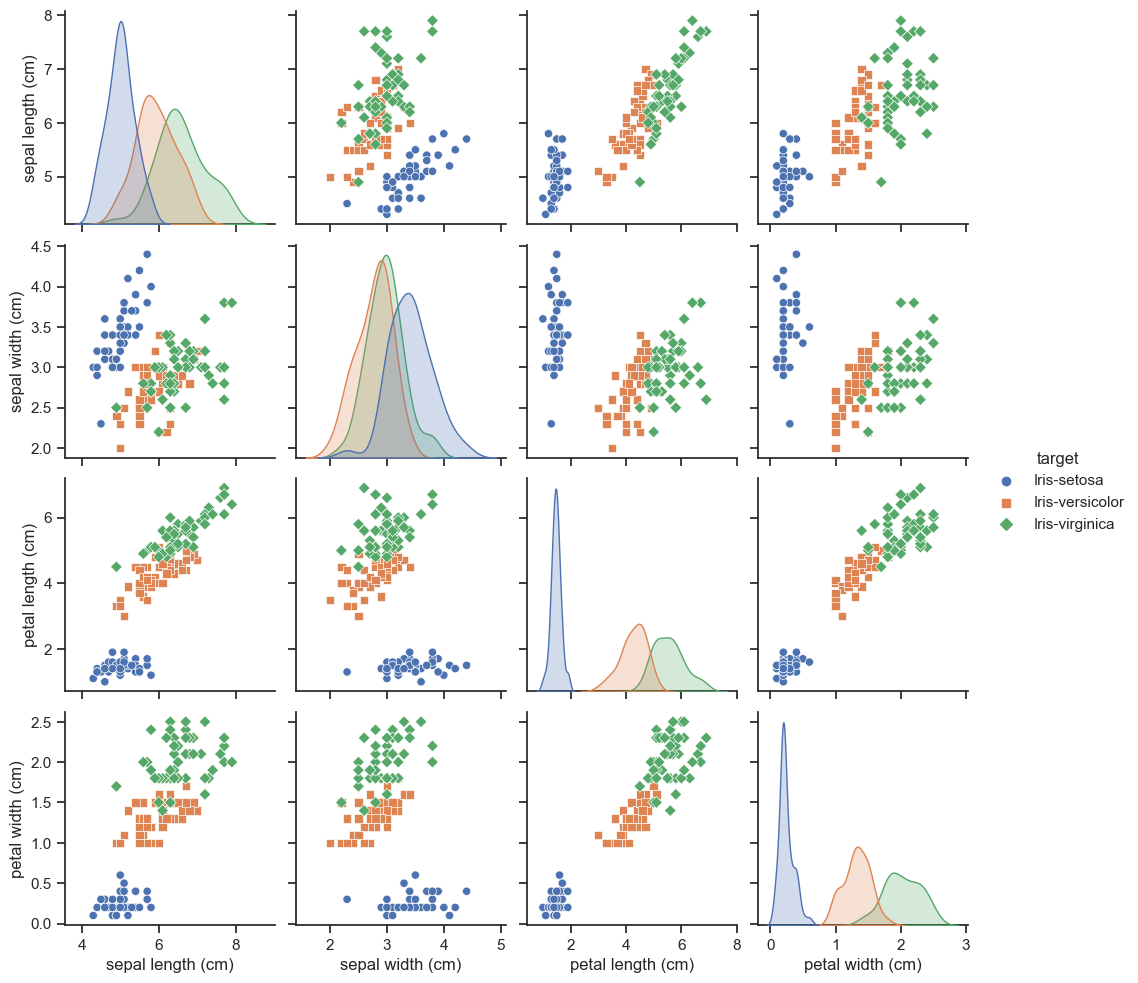

In [4]:
#Q.4 

#Dataset URL:
#https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the Iris dataset from the CSV file
iris_df = pd.read_csv("iris_dataset.csv")

# Create a pairplot
sns.set(style="ticks")
sns.pairplot(iris_df, hue="target", markers=["o", "s", "D"])

# Show the plot
plt.show()

sns.set(style="ticks") is used to set the style for the pairplot. The "ticks" style is chosen here, which changes the axis to have ticks and removes the top and right spines.

sns.pairplot() is used to create the pairplot. 

It takes several parameters:
iris_df: The DataFrame containing the data to be plotted.

hue="target": The "target" column is used to color the data points based on the species of the Iris flowers (e.g., setosa, versicolor, or virginica).

markers=["o", "s", "D"]: The markers used to represent data points for each species. Here, "o" represents setosa, "s" represents versicolor, and "D" represents virginica.

To change the colors used for different species, you can specify a custom color palette using sns.set_palette().

To modify the font sizes and styles, you can use functions like sns.set_context().

You can adjust the size of the plot using plt.figure() and specifying the figsize parameter.

To change the scales or add labels to the axes, you can use functions like plt.xscale(), plt.yscale(), and plt.xlabel()/plt.ylabel().